In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm

## 1. Confidence interval for a mean (Page 251 - Section 7.1)

EXERCISE

Estimate the mean yearly salary of a professional developer.

In [3]:
survey = pd.read_csv('survey_results_public.csv')
survey.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
# YOUR CODE HERE

SOLUTION:

In [4]:
# Since we are interested in "professional developers"
# filter accordingly
developers = survey[survey['MainBranch'] == 'I am a developer by profession']

In [8]:
developers_that_shared_salary = developers.dropna(subset=['ConvertedCompYearly'])
n = len(developers_that_shared_salary)
print(f'{n} shared their salary info')

21549 shared their salary info


In [9]:
# this is our point estimate
x_bar = np.mean(developers_that_shared_salary['ConvertedCompYearly'])
x_bar

86730.87628196205

We need to check two conditions for CLT (Section 7.1.2 Page 251)


**Independence.** The sample observations must be independent, The most common way to satisfy this condition is when the sample is a simple random sample from the population. If the data come from a random process, analogous to rolling a die, this would also satisfy the independence condition.

**Normality.** When a sample is small, we also require that the sample observations come from a normally distributed population. We can relax this condition more and more for larger and larger sample sizes. This condition is obviously vague, making it difficult to evaluate, so next we introduce a couple rules of thumb to make checking this condition easier.

We can assume that the respondent are independent. What about the normality? We know that salary distribution is skewed, a lot of people is around $86,731 mean we calculated but a few people can earn on the order of millions. Let's plot the histogram:

(array([2.1534e+04, 9.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.00000000e+00, 1.62566120e+06, 3.25132140e+06, 4.87698160e+06,
        6.50264180e+06, 8.12830200e+06, 9.75396220e+06, 1.13796224e+07,
        1.30052826e+07, 1.46309428e+07, 1.62566030e+07]),
 <BarContainer object of 10 artists>)

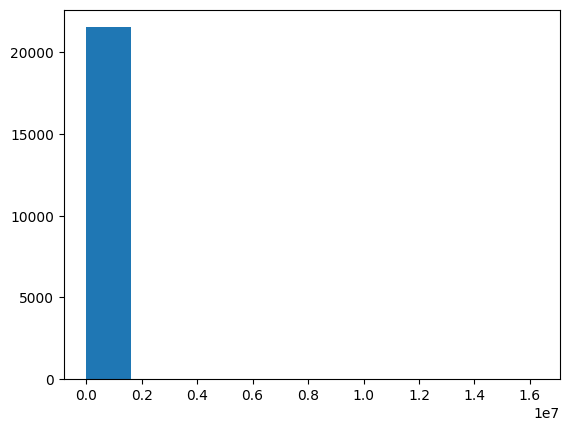

In [10]:
plt.hist(developers_that_shared_salary['ConvertedCompYearly'])

very skewed indeed.

In [11]:
# Let's check people earning more than 3 std above the mean
salary_3std = x_bar + 3*np.std(developers_that_shared_salary['ConvertedCompYearly'])
salary_3std

663002.8020064274

In [12]:
devs_who_earn_3std_plus_mean = developers_that_shared_salary[developers_that_shared_salary['ConvertedCompYearly'] > salary_3std]
devs_who_earn_3std_plus_mean.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
828,829,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Bootstrapping a business;Professional de...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,30.0,10.0,0.0,5.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,1000000.0,8.0
1932,1933,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Other online ...,Technical documentation;Blogs;Books;Written Tu...,...,15.0,10.0,15.0,15.0,0.0,15.0,Appropriate in length,Easy,945000.0,2.0
2171,2172,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,20.0,10.0,20.0,25.0,0.0,0.0,Appropriate in length,Easy,750000.0,8.0
2187,2188,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Technical documentation;Written Tutorials;Stac...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,2000000.0,NaN
2316,2317,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","School (i.e., University, College, etc);Other ...",NaN,...,10.0,10.0,40.0,0.0,0.0,0.0,Too long,Easy,1000000.0,10.0


In [13]:
print(f'{len(devs_who_earn_3std_plus_mean)} out of {n} devs earn ${salary_3std/1_000:.0f}k or more per year')

75 out of 21549 devs earn $663k or more per year


this is clearly skewed, can we still assume that the sampling distribution is normal?

NOTE: The question we are asking is if the sampling distribution is normal. We know for a fact that the salary distribution is not normal.

Page 251:

RULES OF THUMB: HOW TO PERFORM THE NORMALITY CHECK
There is no perfect way to check the normality condition, so instead we use two rules of thumb:

n < 30: If the sample size $n$ is less than 30 and there are no clear outliers in the data, then we typically assume the data come from a nearly normal distribution to satisfy the condition.

n ≥ 30: If the sample size $n$ is at least 30 and there are no particularly extreme outliers, then we typically assume the sampling distribution of $\bar{x}$ is nearly normal, even if the underlying distribution of individual observations is not.

clearly our $n >> 30$ but we also have extreme outliers, what to do?

Let's do the following:

1) Calculate 95% CI as if the normality condition holds
2) Calculate 95% CI with a method that does not require normality condition
3) Compare

EXERCISE:

Calculate 95% CI assuming normality condition holds:

In [11]:
# YOUR CODE HERE

SOLUTION:

In [14]:
# sample standard deviation
# ddof = 1
s = np.std(developers_that_shared_salary['ConvertedCompYearly'], ddof=1)

In [16]:
se = s / np.sqrt(n)
se

1308.587370166596

In [17]:
# z * se for 95% CI
margin_of_error = norm.ppf(0.975) * se
margin_of_error

2564.784116150512

In [18]:
lower_bound = x_bar - margin_of_error
upper_bound = x_bar + margin_of_error

In [22]:
# SOLUTION
print(f"{x_bar:.0f} (95% CI: {lower_bound:.0f} - {upper_bound:.0f})")

86731 (95% CI: 84166 - 89296)


We are 95% confident that the population parameter is between $84k and $89k.

As our second approach we will use the [bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)).

Bootstrapping is a statistical resampling technique used to estimate the distribution of a statistic (like the mean or median) by repeatedly sampling with replacement from the observed data. This method allows for the assessment of the variability and confidence intervals of the statistic without relying on assumptions about the underlying population distribution. By generating a large number of resampled datasets (typically thousands), bootstrapping creates an empirical distribution of the statistic, which can be used to make inferences about the population, especially in cases where traditional parametric methods may not be appropriate or where the sample size is small.

The size of our sample is more than 20k. So we can sample < 10% repeatedly (say 2k), and create a sampling distribution.

EXERCISE

1. Sample 1k developers from our sample.
2. Calculate their mean yearly salary
3. Save it into a list
4. Repeat many times (the more the better, but it shouldn't take ages so start small and increase)
5. Plot the sampling distribution
6. Estimate the 95% CI

In [24]:
# YOUR CODE HERE

SOLUTION

In [27]:
def bootstrap(data, n_iterations):
    means = []
    for _ in range(n_iterations):
        sample = np.random.choice(data, size=2000, replace=True)
        means.append(np.mean(sample))
    return means

In [28]:
# Set n_iterations small (say 1000) gradually increase
means = bootstrap(developers_that_shared_salary['ConvertedCompYearly'], n_iterations=1000000)

(array([1.24780e+04, 3.98364e+05, 3.84724e+05, 1.49623e+05, 4.21570e+04,
        1.03770e+04, 1.87200e+03, 3.44000e+02, 5.40000e+01, 7.00000e+00]),
 array([ 75331.184  ,  80175.28805,  85019.3921 ,  89863.49615,
         94707.6002 ,  99551.70425, 104395.8083 , 109239.91235,
        114084.0164 , 118928.12045, 123772.2245 ]),
 <BarContainer object of 10 artists>)

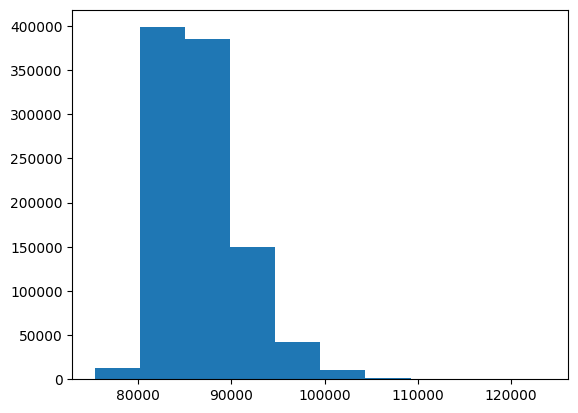

In [29]:
plt.hist(means)

In [40]:
# THIS WAS OUR ESTIMATE ASSUMING NORMALITY HOLDS
print(f"{x_bar:.0f} (95% CI: {lower_bound:.0f} - {upper_bound:.0f})")

85762 (95% CI: 80754 - 97315)


In [41]:
# Let's find out the new CI
lower_bound = np.percentile(means, 2.5)
upper_bound = np.percentile(means, 97.5)
x_bar = np.percentile(means, 50)

In [42]:
# OUR ESTIMATE WITHOUT THE NORMALITY ASSUMPTION
print(f"{x_bar:.0f} (95% CI: {lower_bound:.0f} - {upper_bound:.0f})")

85762 (95% CI: 80754 - 97315)


The 95% CI is much wider without the normality assumption. Looking at the sampling distribution it is skewed to the right. Hence the normality assumption is not valid. We should report the results of our second approach.

EXERCISE

What are the similarities and differences between bootstrapping and cross-validation?

# 2. Comparing many means with ANOVA (Page 285 - Section 7.5)

This is left for you as an exercise. Based on the StackOverflow survey create a hypothesis test that is suitable for ANOVA. Conduct the test using `scipy.stats.f_oneway`.

In [24]:
# YOUR CODE HERE